In [123]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 24 02:24:12 2019

@author: Admin
"""

import pandas as pd
import numpy as np

from scipy.signal import savgol_filter, argrelextrema
import openpyxl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

import pickle
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix

import warnings,os
warnings.simplefilter('ignore')

import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import csv

import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams

path="C:\\Users\\Admin\\Documents\\"

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [124]:
def CreateData(dataFrame):
    dataset =np.array( dataFrame.iloc[:, 0:654])
    target = dataFrame.loc[:,['label']]
    target = np.array(target.replace(to_replace=['О', 'К'], value=[1, 0]))
    target =target.astype('int32')   
    target.transpose()
    return dataset,target

In [125]:
#сохранение
def saveModel(score,path,nameModel):
    save=False
    dateFile = os.listdir(path)
    name=path+ str(score)+'_'+nameModel+'.pkl'
    for item in dateFile:
        temp=item.split('_')
        if len(temp)==2:
            if (temp[1].find(nameModel)!=-1):
                if (float(temp[0])<score):
                    print("Модель",nameModel,"сохранена\n")
                    save=True
                break
    else:
        save=True
    return save,name

In [126]:
path="C:\\Users\\admin\\Downloads\\Telegram Desktop\\new_sav_filter_data_scaled.xlsx"
dataFrame = pd.read_excel(path)
path="C:\\Users\\Admin\\Documents\\PythonRamanNew\\"
clear_data, target=CreateData(dataFrame)
target = target.ravel()


# Блок отбора признаков

In [127]:
"""пока пусто"""
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import ExtraTreesClassifier

'пока пусто'

Best parameter (CV score=0.592):
{'logistic__C': 0.0001, 'logistic__n_jobs': -1, 'logistic__penalty': 'l2', 'pca__n_components': 7}


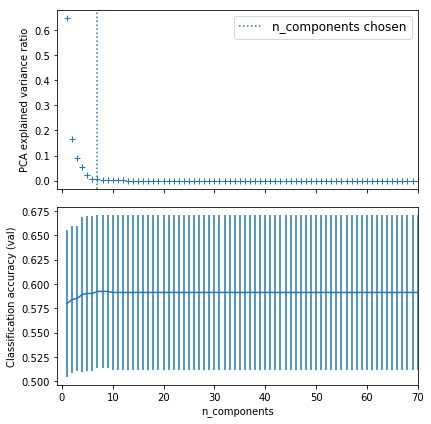

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [128]:
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [item for item in range(1,100,1)],
    'logistic__C': np.logspace(-4, 4, 4),
    'logistic__penalty': ['l2'],
    'logistic__n_jobs': [-1]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(clear_data, target)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(clear_data)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

pca_2 = PCA(n_components =search.best_estimator_.named_steps['pca'].n_components).fit(clear_data)
print(pca_2)
clear_data_out = pca_2.transform(clear_data)

# Анализ новой выборки

https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

,0,1,2,3,4,5,6
0,1.000000e+00,-6.312111e-15,-5.258485e-16,-1.490326e-17,1.057129e-15,8.593618e-17,1.534602e-15
1,-6.312111e-15,1.000000e+00,-2.999779e-16,1.207400e-16,-4.545658e-16,-8.932770e-16,-1.145837e-16
2,-5.258485e-16,-2.999779e-16,1.000000e+00,-4.723639e-16,-1.526554e-16,1.789758e-16,4.931845e-16
3,-1.490326e-17,1.207400e-16,-4.723639e-16,1.000000e+00,-1.545116e-16,2.791921e-17,7.197659e-16
4,1.057129e-15,-4.545658e-16,-1.526554e-16,-1.545116e-16,1.000000e+00,7.136290e-15,-1.941827e-16
5,8.593618e-17,-8.932770e-16,1.789758e-16,2.791921e-17,7.136290e-15,1.000000e+00,-4.352130e-17
6,1.534602e-15,-1.145837e-16,4.931845e-16,7.197659e-16,-1.941827e-16,-4.352130e-17,1.000000e+00


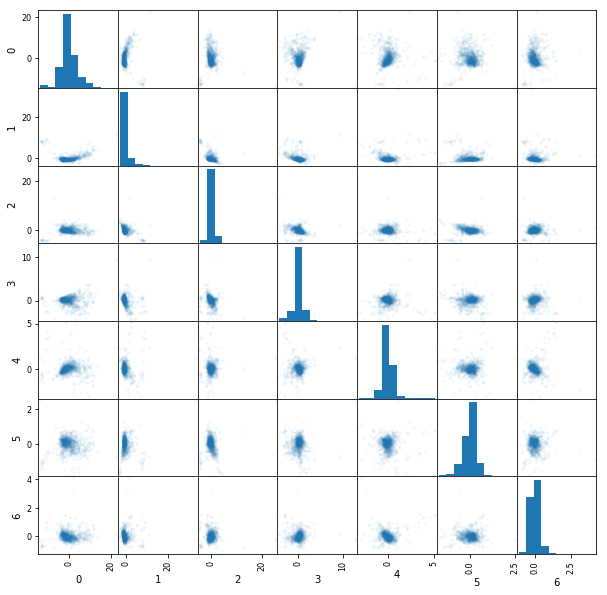

In [129]:
from pandas.tools.plotting import scatter_matrix
pd_clear_data_out = pd.DataFrame(data=clear_data_out[0:,0:],    # values
              index=range(0, len(clear_data_out)),    # 1st column as index
              columns=range(0, len(clear_data_out[0])))
                                 
scatter_matrix(pd_clear_data_out, alpha=0.05, figsize=(10, 10))
pd_clear_data_out.corr()

# Используем все данные в обучающей выборке

Чтоб не переписывать код присвоим переменным normalized_test_dataset, test_target значения всей выборки

In [130]:
normalized_train_dataset = clear_data_out
train_target = target

normalized_test_dataset = clear_data_out
test_target = target

spec=[]
ch=[]
Score=[]

In [131]:
all_models = {
    'lgModel':None,
    'sgv_classifier':None,
    'linear_svc':None,
    'nu_svc':None,
    'k_neighbors':None,
    'rdf_model':None,
}

# Логическая регрессия
LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Логическая регрессия

0.4180497925311203 0.0001 

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.47      0.50       435
           1       0.61      0.68      0.64       529

   micro avg       0.58      0.58      0.58       964
   macro avg       0.58      0.57      0.57       964
weighted avg       0.58      0.58      0.58       964

Точноть 0.58298755186722
Специфичность 0.4666666666666667
Чувствительность 0.6786389413988658
--------------
f1ScoreWeighted= 0.5785306207339761
f1ScoreMacro= 0.5717733380480905
f1ScoreBinary= 0.6410714285714286


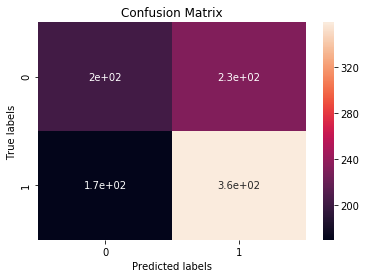

In [132]:
from sklearn.linear_model import LogisticRegression
#Логическая регрессия
print("Логическая регрессия\n")

#GridSearchCV
tuned_parameters = {'C': np.logspace(-4, 4, 4),
                    'penalty': ['l2'],
                    'n_jobs': [-1]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, 
                   cv=5, scoring="accuracy")
grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
best_parameter = grid.best_estimator_.C
print (best_cv_err2, best_parameter,"\n")

#Обучение модели с оптимальными параметрами
all_models['lgModel'] = LogisticRegression(C=grid.best_estimator_.C,
                            penalty=grid.best_estimator_.penalty,
                             n_jobs=grid.best_estimator_.n_jobs,
                            )
print(all_models['lgModel'])
print('--------------------------------------------------------')
all_models['lgModel'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['lgModel'].predict(normalized_test_dataset)

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['lgModel'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['К', 'О']); 
# ax.xaxis.set_ticklabels(['К', 'О']); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)

Score.append(buff_score)


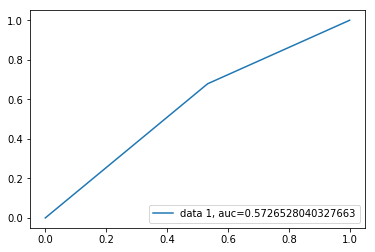

In [133]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Stochastic Gradient Descent
Stochastic Gradient Descent

Документация:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

доп инфо:
https://scikit-learn.org/stable/modules/sgd.html

Stochastic Gradient Descent


            best_parameter_alpha: 0.001
 
            best_parameter_n_iter: 1000

            best_parameter_loss: modified_huber
 
            best_parameter_penalty: l2
 
            best_parameter_n_jobs: -1

        
---------------------------------------------------------------
SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
       max_iter=None, n_iter=1000, n_iter_no_change=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.64      0.20      0.30       435
           1       0.58      0.91      0.71       529

   micro avg       0.59      0.59      0.59       964
   macro avg       0.61      0.55      0.50       964
weigh

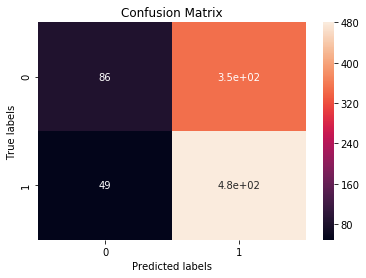

In [161]:
from sklearn.linear_model import SGDClassifier
#Stochastic Gradient Descent
print("Stochastic Gradient Descent\n")

#GridSearchCV
tuned_parameters = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log', 
             'hinge', 
             'modified_huber', 
             'squared_hinge', 
             'perceptron',
             'squared_loss',
              'epsilon_insensitive',
            ], # logistic regression,
    'penalty': ['l2','l1', 'elasticnet'],
    'n_jobs': [-1]
}
grid = GridSearchCV(SGDClassifier(), tuned_parameters, 
                   cv=5, scoring="accuracy")
grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
best_parameter_alpha = grid.best_estimator_.alpha
best_parameter_n_iter = grid.best_estimator_.n_iter
best_parameter_loss = grid.best_estimator_.loss
best_parameter_penalty = grid.best_estimator_.penalty
best_parameter_n_jobs = grid.best_estimator_.n_jobs
print ("""
            best_parameter_alpha: {best_parameter_alpha}\n 
            best_parameter_n_iter: {best_parameter_n_iter}\n
            best_parameter_loss: {best_parameter_loss}\n 
            best_parameter_penalty: {best_parameter_penalty}\n 
            best_parameter_n_jobs: {best_parameter_n_jobs}\n
        """.format(
                best_parameter_alpha= best_parameter_alpha, 
                best_parameter_n_iter= best_parameter_n_iter, 
                best_parameter_loss= best_parameter_loss, 
                best_parameter_penalty= best_parameter_penalty, 
                best_parameter_n_jobs= best_parameter_n_jobs, 
    ))


#Обучение модели с оптимальными параметрами
all_models['sgv_classifier'] = SGDClassifier(alpha= best_parameter_alpha, 
        n_iter= best_parameter_n_iter, 
        loss= best_parameter_loss, 
        penalty= best_parameter_penalty, 
        n_jobs= best_parameter_n_jobs)
print('---------------------------------------------------------------')
print(all_models['sgv_classifier'])
all_models['sgv_classifier'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['sgv_classifier'].predict(normalized_test_dataset)

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['sgv_classifier'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

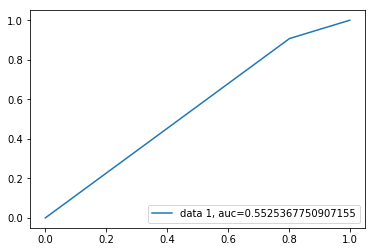

In [162]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# LinearSVC


            best_cv_err2: 0.41493775933609955

            C: 10
 
        
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
              precision    recall  f1-score   support

           0       0.62      0.30      0.41       435
           1       0.60      0.85      0.70       529

   micro avg       0.60      0.60      0.60       964
   macro avg       0.61      0.58      0.55       964
weighted avg       0.61      0.60      0.57       964

Точноть 0.6016597510373444
Специфичность 0.30344827586206896
Чувствительность 0.8468809073724007
--------------
f1ScoreWeighted= 0.5679691101890271
f1ScoreMacro= 0.5537037037037037
f1ScoreBinary= 0.7


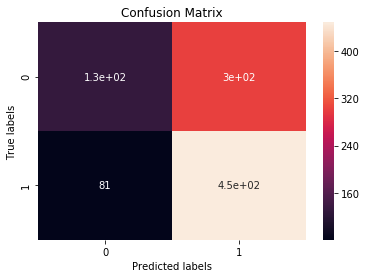

In [136]:
from sklearn.svm import LinearSVC
#LinearSVC

#GridSearchCV

tuned_parameters = {'C': [1, 10, 100, 1000]}

grid = GridSearchCV(LinearSVC(), tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
C = grid.best_estimator_.C
print ("""
            best_cv_err2: {best_cv_err2}\n
            C: {C}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                C= C, 
    ))


#Обучение модели с оптимальными параметрами
all_models['linear_svc'] = LinearSVC(C= C)
print(all_models['linear_svc'])
all_models['linear_svc'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['linear_svc'].predict(normalized_test_dataset)
predicted_sgv_classifier=predicted

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['linear_svc'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

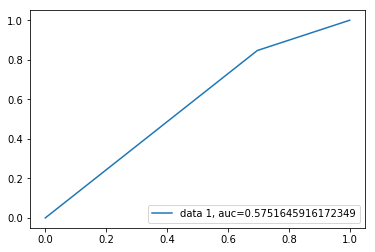

In [137]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Nu-Support Vector Classification
Similar to SVC but uses a parameter to control the number of support vectors.

The implementation is based on libsvm.
https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html


            best_cv_err2: 0.4159751037344398

            kernel: linear

            nu: 0.55
 
        
NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='linear', max_iter=-1, nu=0.55, probability=True,
   random_state=None, shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       435
           1       0.60      0.62      0.61       529

   micro avg       0.57      0.57      0.57       964
   macro avg       0.56      0.56      0.56       964
weighted avg       0.57      0.57      0.57       964

Точноть 0.5674273858921162
Специфичность 0.5011494252873563
Чувствительность 0.6219281663516069
--------------
f1ScoreWeighted= 0.5665372149247272
f1ScoreMacro= 0.5616150931050465
f1ScoreBinary= 0.612093023255814


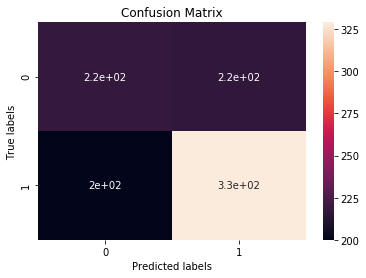

In [169]:
from sklearn.svm import NuSVC
#LinearSVC

#GridSearchCV

tuned_parameters = {'nu':np.arange(.05,0.95,0.05),
                    'kernel': ['linear']
                   }

grid = GridSearchCV(NuSVC(), tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
kernel = grid.best_estimator_.kernel
nu = grid.best_estimator_.nu
print ("""
            best_cv_err2: {best_cv_err2}\n
            kernel: {kernel}\n
            nu: {nu}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                kernel= kernel, 
                nu= nu, 
    ))


#Обучение модели с оптимальными параметрами
all_models['nu_svc'] = NuSVC(kernel= kernel,nu=nu,probability=True)
print(all_models['nu_svc'])
all_models['nu_svc'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['nu_svc'].predict(normalized_test_dataset)
predicted_sgv_classifier=predicted

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['nu_svc'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

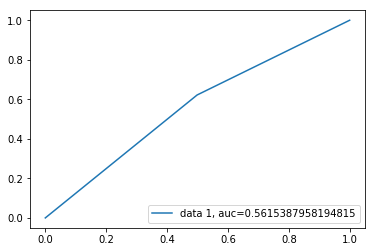

In [170]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Создание модели КNN


            best_cv_err2: 0.4066390041493776

            n_neighbors: 82
 
        
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=82, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.66      0.27      0.39       435
           1       0.60      0.88      0.71       529

   micro avg       0.61      0.61      0.61       964
   macro avg       0.63      0.58      0.55       964
weighted avg       0.63      0.61      0.57       964

Точноть 0.6089211618257261
Специфичность 0.2735632183908046
Чувствительность 0.8846880907372401
--------------
f1ScoreWeighted= 0.5658198903586341
f1ScoreMacro= 0.549931578523706
f1ScoreBinary= 0.7128712871287128


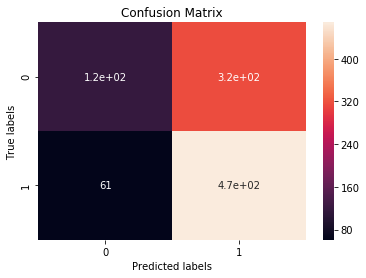

In [147]:
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = {'n_neighbors': list(range(1,100))}

grid = GridSearchCV(KNeighborsClassifier(), tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
n_neighbors = grid.best_estimator_.n_neighbors
print ("""
            best_cv_err2: {best_cv_err2}\n
            n_neighbors: {n_neighbors}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                n_neighbors= n_neighbors, 
    ))


#Обучение модели с оптимальными параметрами
all_models['k_neighbors'] = KNeighborsClassifier(n_neighbors = n_neighbors)
print(all_models['k_neighbors'])
all_models['k_neighbors'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['k_neighbors'].predict(normalized_test_dataset)

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['k_neighbors'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

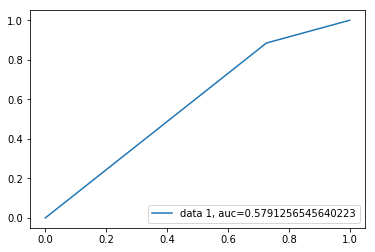

In [148]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Случайный лес


            n_estimators: 26

            max_features: log2
 
        
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       435
           1       1.00      0.99      1.00       529

   micro avg       0.99      0.99      0.99       964
   macro avg       0.99      1.00      0.99       964
weighted avg       0.99      0.99      0.99       964

Точноть 0.9948132780082988
Специфичность 0.9977011494252873
Чувствительность 0.9924385633270322
--------------
f1ScoreWeighted= 0.9948148154155112
f1ScoreMacro= 0.9947666433228557
f1ScoreBina

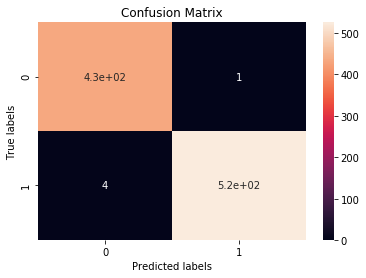

In [149]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = {'n_estimators': np.arange(10,100),'max_features': ['auto', 'sqrt', 'log2']}

rdf = RandomForestClassifier(n_jobs=-1, oob_score = True) 

grid = GridSearchCV(rdf, tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
n_estimators = grid.best_estimator_.n_estimators
max_features = grid.best_estimator_.max_features
print ("""
            n_estimators: {n_estimators}\n
            max_features: {max_features}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                n_estimators= n_estimators, 
                max_features= max_features, 
    ))


#Обучение модели с оптимальными параметрами
all_models['rdf_model'] = RandomForestClassifier(n_estimators = n_estimators,
                                   max_features=max_features,
                                   n_jobs=-1, 
                                   oob_score = True
                                  )
print(all_models['rdf_model'])
all_models['rdf_model'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['rdf_model'].predict(normalized_test_dataset)
predicted_sgv_classifier=predicted

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['rdf_model'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

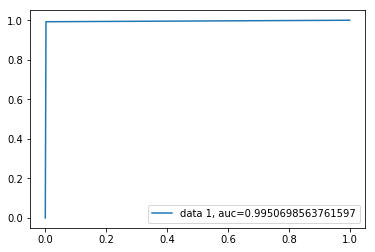

In [150]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Оценка обученных классификаторов 

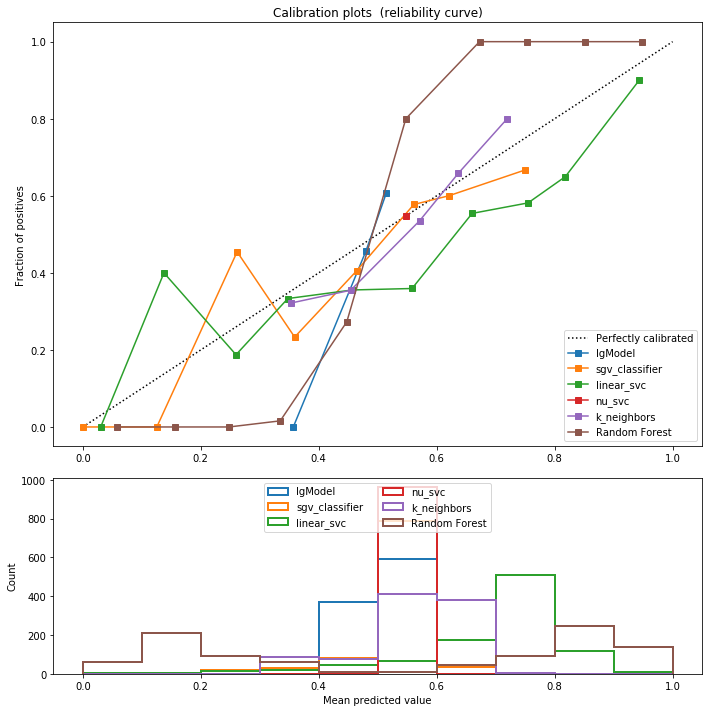

In [171]:
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.calibration import calibration_curve

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(all_models['lgModel'], 'lgModel'),
                  (all_models['sgv_classifier'], 'sgv_classifier'),
                  (all_models['linear_svc'], 'linear_svc'),
                  (all_models['nu_svc'], 'nu_svc'),
                  (all_models['k_neighbors'], 'k_neighbors'),
                  (all_models['rdf_model'], 'Random Forest'),
                 ]:
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(normalized_test_dataset)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(normalized_test_dataset)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(test_target, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Взвешенное голосование 'hard'

0.8578838174273858
0.8578838174273858
[[320 115]
 [ 22 507]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       435
           1       0.82      0.96      0.88       529

   micro avg       0.86      0.86      0.86       964
   macro avg       0.88      0.85      0.85       964
weighted avg       0.87      0.86      0.86       964

Точноть 0.8578838174273858
Специфичность 0.735632183908046
Чувствительность 0.9584120982986768
------------------------
f1ScoreWeighted= 0.8551202393053788
f1ScoreMacro= 0.8523269452895865
f1ScoreBinary= 0.8809730668983493


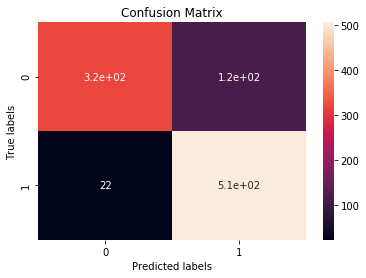

In [172]:
eclf1 = VotingClassifier(estimators=[('rdf_model',all_models['rdf_model']),
                                     ('linear_svc', all_models['linear_svc']), 
                                     ('nu_svc', all_models['nu_svc']),
                                        ], 
                                     voting='hard')
eclf1 = eclf1.fit(normalized_train_dataset, train_target)

print(eclf1.score( normalized_train_dataset, train_target))

print(eclf1.score( normalized_test_dataset, test_target))

expected = test_target
predicted_VotingClassifier = eclf1.predict(normalized_test_dataset)

#---------------------------------------------------------------------
#Отрисовка confusion_matrix

cm = metrics.confusion_matrix(expected, predicted_VotingClassifier)
print(cm)
spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=eclf1.score(normalized_test_dataset, test_target)
Score.append(buff_score)
print(metrics.classification_report(expected, predicted_VotingClassifier))
print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('------------------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
#--------------------------------------------------------------------
#Результаты
f1ScoreWeighted=f1_score(test_target, predicted_VotingClassifier, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted_VotingClassifier, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)
      
f1ScoreBinary=f1_score(test_target, predicted_VotingClassifier, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)




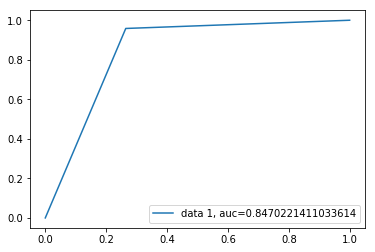

In [173]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted_VotingClassifier)
auc = metrics.roc_auc_score(expected, predicted_VotingClassifier)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Взвешенное голосование 'soft'

0.9719917012448133
0.9719917012448133
[[412  23]
 [  4 525]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       435
           1       0.96      0.99      0.97       529

   micro avg       0.97      0.97      0.97       964
   macro avg       0.97      0.97      0.97       964
weighted avg       0.97      0.97      0.97       964

Точноть 0.9719917012448133
Специфичность 0.9471264367816092
Чувствительность 0.9924385633270322
--------------
f1ScoreWeighted= 0.9719260907200525
f1ScoreMacro= 0.9716014912817625
f1ScoreBinary= 0.9749303621169917


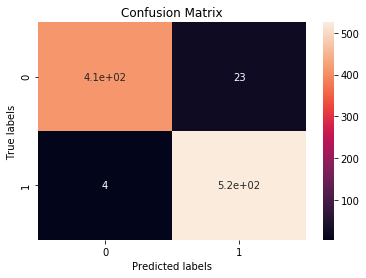

In [177]:
eclf2 = VotingClassifier(estimators=[('rdf_model',all_models['rdf_model']),
                                     ('sgv_classifier', all_models['sgv_classifier']), 
                                     ('nu_svc', all_models['nu_svc']),
                                     ('lgModel', all_models['lgModel']),
                                        ], 
                                     voting='soft')
eclf2 = eclf2.fit(normalized_train_dataset, train_target)

print(eclf2.score( normalized_train_dataset, train_target))

print(eclf2.score( normalized_test_dataset, test_target))

expected = test_target
predicted_VotingClassifier = eclf2.predict(normalized_test_dataset)

#---------------------------------------------------------------------
#Отрисовка confusion_matrix

cm = metrics.confusion_matrix(expected, predicted_VotingClassifier)
print(cm)
spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=eclf2.score(normalized_test_dataset, test_target)
Score.append(buff_score)
print(metrics.classification_report(expected, predicted_VotingClassifier))
print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
#--------------------------------------------------------------------
#Результаты
f1ScoreWeighted=f1_score(test_target, predicted_VotingClassifier, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted_VotingClassifier, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)
      
f1ScoreBinary=f1_score(test_target, predicted_VotingClassifier, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)

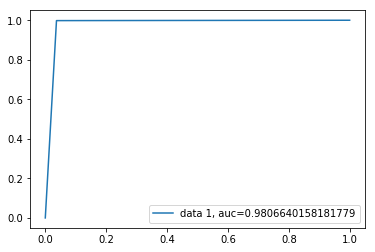

In [176]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted_VotingClassifier)
auc = metrics.roc_auc_score(expected, predicted_VotingClassifier)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()